In [0]:
# !pip install descartes
# !pip install geopandas

In [1]:
!unzip FinalOutputs.zip

Archive:  FinalOutputs.zip
replace FinalOutputs/CT_Stats.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/CT_Stats.dbf  
replace FinalOutputs/CT_Stats.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/CT_Stats.prj  
replace FinalOutputs/CT_Stats.qpj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/CT_Stats.qpj  
replace FinalOutputs/CT_Stats.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/CT_Stats.shp  
replace FinalOutputs/CT_Stats.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/CT_Stats.shx  
replace FinalOutputs/DB_Stats.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/DB_Stats.dbf  
replace FinalOutputs/DB_Stats.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/DB_Stats.prj  
replace FinalOutputs/DB_Stats.qpj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FinalOutputs/DB_Stats.qpj  
replace FinalOutputs/DB_Stats.shp? [y]es, [n]

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler #for standardization
print('Libraries imported.')


Libraries imported.


In [0]:
ctstats = gpd.read_file('FinalOutputs/CT_Stats.shp')

In [0]:
dbstats = gpd.read_file('FinalOutputs/DB_Stats.shp')

In [0]:
gridstats = gpd.read_file('FinalOutputs/GRID_Stats.shp')

# 1. Census Tract

In [6]:
ctstats.describe()

,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio
count,4.900000e+01,49.000000,49.000000,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000,49.000000
mean,1.725584e+07,234.781478,2003.795918,9.984835e-04,3.434071e+05,0.155841,2.943307,700.959184,0.339713
std,9.461521e+07,375.261951,983.608217,5.620423e-04,2.139301e+05,0.066330,1.748940,445.216940,0.099833
min,5.018554e+05,93.981718,13.000000,2.000000e-08,3.509556e+03,0.000005,1.774306,6.000000,0.138462
25%,1.336939e+06,121.691518,1488.000000,6.311200e-04,2.056291e+05,0.145332,2.178488,443.000000,0.288525
50%,1.736146e+06,144.937066,1841.000000,1.125610e-03,3.044708e+05,0.167110,2.355070,592.000000,0.316940
75%,2.428093e+06,246.231107,2674.000000,1.398620e-03,3.870525e+05,0.191665,2.801816,850.000000,0.363694
max,6.649859e+08,2744.717766,4117.000000,2.197400e-03,1.185492e+06,0.355494,11.783530,1964.000000,0.626804


In [7]:
ctstats.head()

,CTUID,PRNAME,CMANAME,CMATYPE,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio,geometry
0,7050100.12,Saskatchewan,Regina,B,9.886176e+06,207.743248,3421,3.460400e-04,710689.652329,0.071887,2.269360,1146,0.334990,"POLYGON ((5313856.75143 1677717.71143, 5313403..."
1,7050100.13,Saskatchewan,Regina,B,8.509538e+06,262.318343,2054,2.413800e-04,538801.877355,0.063317,2.242403,849,0.413340,"POLYGON ((5313190.09143 1678349.31143, 5313158..."
2,7050100.14,Saskatchewan,Regina,B,6.649859e+08,269.965845,13,2.000000e-08,3509.555987,0.000005,1.862394,6,0.461538,"POLYGON ((5317260.705715 1691091.03143, 531730..."
3,7050005.00,Saskatchewan,Regina,B,2.138134e+06,102.769961,3141,1.469040e-03,322800.447030,0.150973,2.637148,990,0.315186,"POLYGON ((5303740.34 1679038.68, 5303777.06285..."
4,7050006.00,Saskatchewan,Regina,B,1.273107e+07,277.171637,2442,1.918100e-04,676853.138049,0.053165,3.868232,762,0.312039,"POLYGON ((5305754.04857 1677692.21143, 5305760..."


## We need only the 5 statistics, the Census Tract ID and the geometry of the CT polygons

In [8]:
df_ct = ctstats.drop(['PRNAME','CMANAME','CMATYPE','area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_ct.head()

,CTUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
0,7050100.12,207.743248,3.460400e-04,0.071887,2.269360,0.334990,"POLYGON ((5313856.75143 1677717.71143, 5313403..."
1,7050100.13,262.318343,2.413800e-04,0.063317,2.242403,0.413340,"POLYGON ((5313190.09143 1678349.31143, 5313158..."
2,7050100.14,269.965845,2.000000e-08,0.000005,1.862394,0.461538,"POLYGON ((5317260.705715 1691091.03143, 531730..."
3,7050005.00,102.769961,1.469040e-03,0.150973,2.637148,0.315186,"POLYGON ((5303740.34 1679038.68, 5303777.06285..."
4,7050006.00,277.171637,1.918100e-04,0.053165,3.868232,0.312039,"POLYGON ((5305754.04857 1677692.21143, 5305760..."


## Classification Task on the Census Tract data

### Creating Standardized/normalized data for scale invariance as below:

### For every given variable x we standardize it as: $\frac{(x-\mu)}{\sigma}$ , where $\mu$ is the mean and $\sigma$ is standard deviation

In [9]:
from sklearn.preprocessing import StandardScaler #for standardization

X = df_ct.values[:,1:-1] #we are taking only the 5 statistics
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar from unscaled data a 
cluster_dataset

array([[-7.27982861e-02, -1.17287393e+00, -1.27881335e+00,
        -3.89339302e-01, -4.77981855e-02],
       [ 7.41408187e-02, -1.36101741e+00, -1.40935162e+00,
        -4.04912365e-01,  7.45146368e-01],
       [ 9.47311099e-02, -1.79490152e+00, -2.37374474e+00,
        -6.24443626e-01,  1.23294247e+00],
       [-3.55430516e-01,  8.45902387e-01, -7.41501711e-02,
        -1.76868115e-01, -2.48220436e-01],
       [ 1.14132132e-01, -1.45012760e+00, -1.56399008e+00,
         5.34329310e-01, -2.80069157e-01],
       [ 9.88156383e-02, -6.02097735e-01,  3.70162672e-01,
         8.13292052e-01, -3.57911063e-01],
       [-2.45178603e-01,  1.22450834e+00,  1.30323958e+00,
        -6.64768253e-01,  2.88726098e+00],
       [-2.56152222e-01,  2.18337994e-01,  8.40388541e-03,
        -1.62241325e-01, -5.25053041e-01],
       [-1.62876001e-01, -1.37369094e+00, -1.75172037e+00,
         1.54253441e-01,  9.64870405e-01],
       [-3.13489651e-01,  1.61909551e+00,  1.04979658e+00,
        -5.35841175e-01

## k-means clustering on Census Tract

In [10]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0], dtype=int32)

In [0]:
new_lab = []
for label in labels:
    new_lab.append("Class "+str(label))

In [12]:
new_lab = np.asarray(new_lab)
new_lab

array(['Class 1', 'Class 1', 'Class 1', 'Class 0', 'Class 1', 'Class 0',
       'Class 0', 'Class 0', 'Class 1', 'Class 0', 'Class 2', 'Class 0',
       'Class 0', 'Class 0', 'Class 1', 'Class 0', 'Class 0', 'Class 0',
       'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 0',
       'Class 0', 'Class 0', 'Class 1', 'Class 0', 'Class 0', 'Class 0',
       'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 0',
       'Class 0', 'Class 1', 'Class 0', 'Class 0', 'Class 0', 'Class 1',
       'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 0', 'Class 0',
       'Class 0'], dtype='<U7')

In [13]:
df_ct['Labels'] = new_lab
df_ct.head()

,CTUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry,Labels
0,7050100.12,207.743248,3.460400e-04,0.071887,2.269360,0.334990,"POLYGON ((5313856.75143 1677717.71143, 5313403...",Class 1
1,7050100.13,262.318343,2.413800e-04,0.063317,2.242403,0.413340,"POLYGON ((5313190.09143 1678349.31143, 5313158...",Class 1
2,7050100.14,269.965845,2.000000e-08,0.000005,1.862394,0.461538,"POLYGON ((5317260.705715 1691091.03143, 531730...",Class 1
3,7050005.00,102.769961,1.469040e-03,0.150973,2.637148,0.315186,"POLYGON ((5303740.34 1679038.68, 5303777.06285...",Class 0
4,7050006.00,277.171637,1.918100e-04,0.053165,3.868232,0.312039,"POLYGON ((5305754.04857 1677692.21143, 5305760...",Class 1


In [0]:
df_ct['Labels'] = df_ct['Labels'].astype(object)

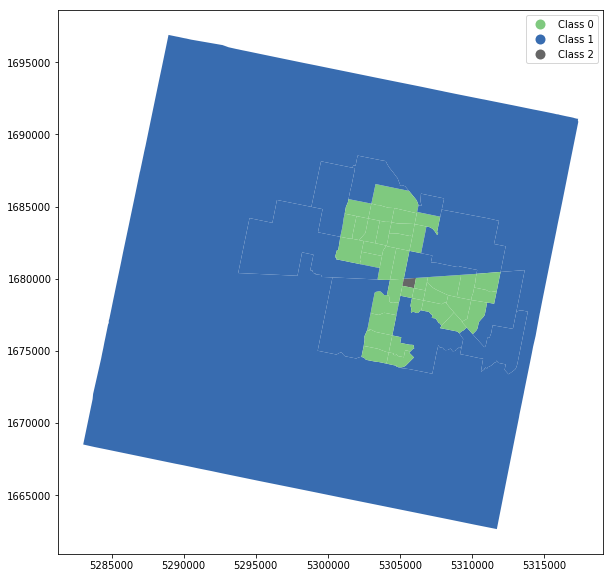

In [15]:
df_ct.plot(figsize= (15,10), column='Labels', legend=True, cmap = 'Accent')
plt.savefig('CTclassification.png')

# Interpretation of Classes

In [0]:
CT_cluster0 = df_ct[df_ct.Labels=="Class 0"]
CT_cluster1 = df_ct[df_ct.Labels=="Class 1"]
CT_cluster2 = df_ct[df_ct.Labels=="Class 2"]

#BCR

In [17]:
data0 = CT_cluster0.describe()["BCR"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["BCR"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["BCR"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.116286
25%    0.156393
50%    0.179057
75%    0.196210
max    0.260404
Name: BCR, dtype: float64
----------------------------
For Class 1
min    0.000005
25%    0.035756
50%    0.063317
75%    0.074339
max    0.182819
Name: BCR, dtype: float64
----------------------------
For Class 2
min    0.355494
25%    0.355494
50%    0.355494
75%    0.355494
max    0.355494
Name: BCR, dtype: float64


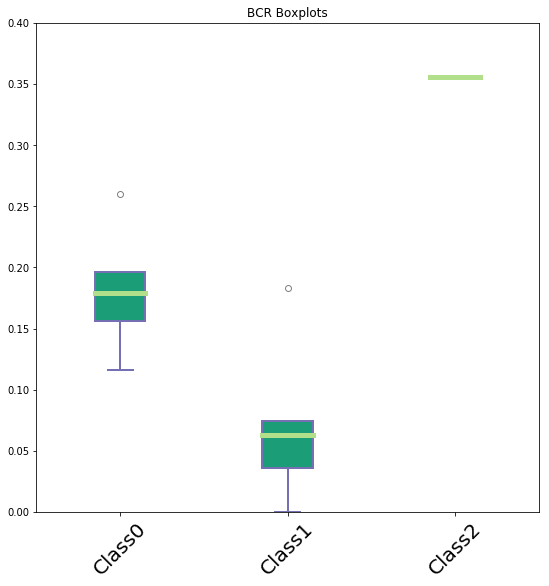

In [19]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('BCR Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.4)

# Save the figure
fig.savefig('BCRforCT.png', bbox_inches='tight')


# BD

In [20]:
data0 = CT_cluster0.describe()["BD"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["BD"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["BD"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.000631
25%    0.000974
50%    0.001240
75%    0.001469
max    0.002197
Name: BD, dtype: float64
----------------------------
For Class 1
min    2.000000e-08
25%    1.807000e-04
50%    2.343300e-04
75%    3.615850e-04
max    5.567300e-04
Name: BD, dtype: float64
----------------------------
For Class 2
min    0.00013
25%    0.00013
50%    0.00013
75%    0.00013
max    0.00013
Name: BD, dtype: float64


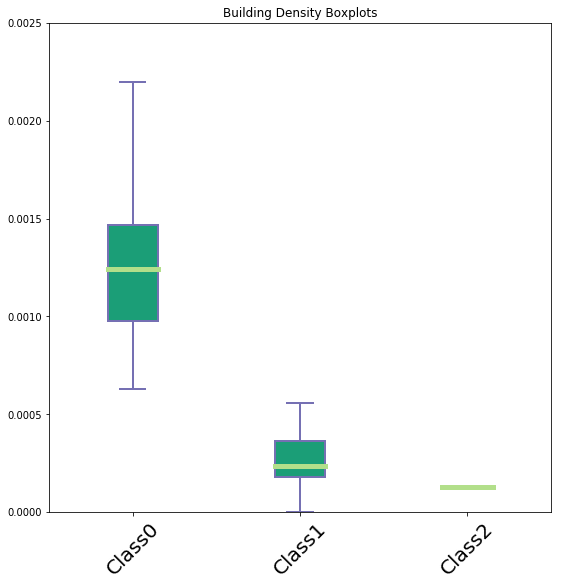

In [21]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Building Density Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.0025)

# Save the figure
fig.savefig('BuildingDensityforCT.png', bbox_inches='tight')


# Mean Proximity

In [22]:
data0 = CT_cluster0.describe()["ProxMean"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["ProxMean"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["ProxMean"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    1.774306
25%    2.148617
50%    2.330137
75%    2.743302
max    4.351117
Name: ProxMean, dtype: float64
----------------------------
For Class 1
min     1.862394
25%     2.224524
50%     2.412966
75%     4.703152
max    11.783530
Name: ProxMean, dtype: float64
----------------------------
For Class 2
min    7.884298
25%    7.884298
50%    7.884298
75%    7.884298
max    7.884298
Name: ProxMean, dtype: float64


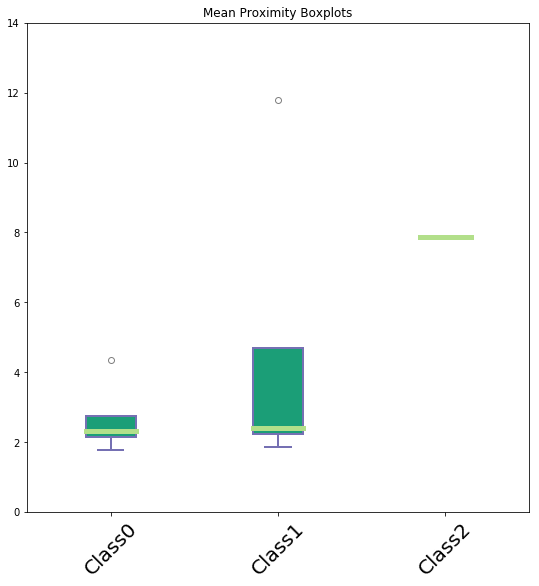

In [25]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Mean Proximity Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,14)

# Save the figure
fig.savefig('MeanProximityforCT.png', bbox_inches='tight')


# Average Size

In [26]:
data0 = CT_cluster0.describe()["AvgSize"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["AvgSize"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["AvgSize"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min     93.981718
25%    117.185315
50%    134.628955
75%    189.869859
max    412.609177
Name: AvgSize, dtype: float64
----------------------------
For Class 1
min    144.429398
25%    192.236287
50%    262.318343
75%    291.119542
max    447.694841
Name: AvgSize, dtype: float64
----------------------------
For Class 2
min    2744.717766
25%    2744.717766
50%    2744.717766
75%    2744.717766
max    2744.717766
Name: AvgSize, dtype: float64


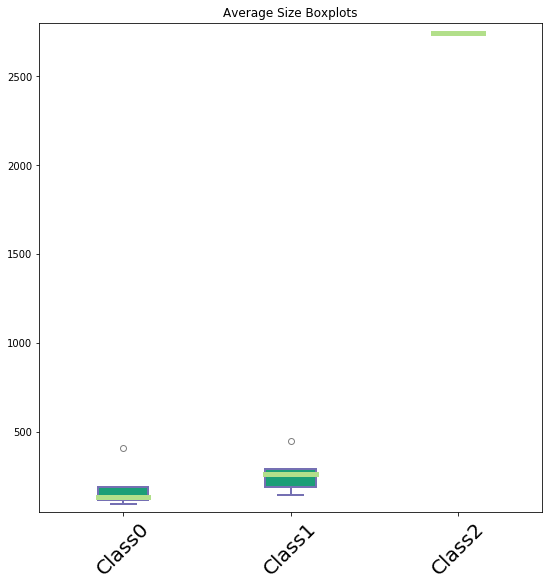

In [27]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Average Size Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(50,2800)

# Save the figure
fig.savefig('AvgsizeforCT.png', bbox_inches='tight')


# Contiguity Ratio

In [28]:
data0 = CT_cluster0.describe()["ContRatio"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = CT_cluster1.describe()["ContRatio"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = CT_cluster2.describe()["ContRatio"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.212418
25%    0.287833
50%    0.305104
75%    0.363694
max    0.626804
Name: ContRatio, dtype: float64
----------------------------
For Class 1
min    0.223330
25%    0.320049
50%    0.330932
75%    0.385732
max    0.461538
Name: ContRatio, dtype: float64
----------------------------
For Class 2
min    0.138462
25%    0.138462
50%    0.138462
75%    0.138462
max    0.138462
Name: ContRatio, dtype: float64


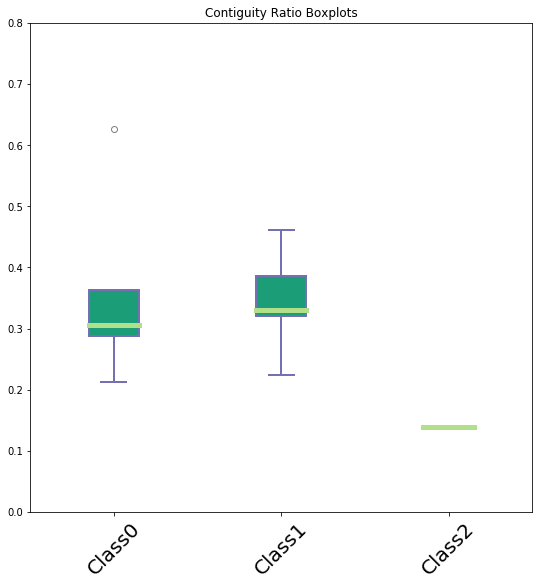

In [30]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Contiguity Ratio Boxplots')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.8)

# Save the figure
fig.savefig('ContiguityRatioforCT.png', bbox_inches='tight')


## Cluster 0
- BCR : Medium
- BD : High
- Mean Proximity : Low
- Average Size : Low
- Contiguity Ratio : Medium

## Cluster 1
- BCR : Low
- BD : Medium
- Mean Proximity : Medium
- Average Size : Medium
- Contiguity Ratio : High

## Cluster 2
- BCR : High
- BD : Low
- Mean Proximity : High
- Average Size : High
- Contiguity Ratio : Low

# 2. Dissemination Block

In [31]:
dbstats.head()

,DBUID,PRNAME,CMANAME,CMATYPE,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio,geometry
0,47060240002,Saskatchewan,Regina,B,24139.041016,159.403587,33,0.001367,5260.318370,0.217917,1.761887,10.0,0.303030,"POLYGON ((5310555.5 1677478.5, 5310619.5 16774..."
1,47060240003,Saskatchewan,Regina,B,18579.753906,193.716986,14,0.000754,2712.037802,0.145967,1.194216,2.0,0.142857,"POLYGON ((5310597.5 1677715.5, 5310833 1677671..."
2,47060241002,Saskatchewan,Regina,B,12597.505859,183.151856,17,0.001349,3113.581559,0.247159,1.180730,4.0,0.235294,"POLYGON ((5309899 1677747.625715, 5309992 1677..."
3,47060241003,Saskatchewan,Regina,B,6476.752930,204.489614,5,0.000772,1022.448069,0.157864,1.062728,2.0,0.400000,"POLYGON ((5309923 1677656.75143, 5310007 16776..."
4,47060241005,Saskatchewan,Regina,B,8103.671875,108.502947,12,0.001481,1302.035365,0.160672,1.567139,NaN,NaN,"POLYGON ((5310024.817145 1677330.957145, 53100..."


In [32]:
df_db = dbstats.drop(['PRNAME','CMANAME','CMATYPE','area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_db.head()

,DBUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
0,47060240002,159.403587,0.001367,0.217917,1.761887,0.303030,"POLYGON ((5310555.5 1677478.5, 5310619.5 16774..."
1,47060240003,193.716986,0.000754,0.145967,1.194216,0.142857,"POLYGON ((5310597.5 1677715.5, 5310833 1677671..."
2,47060241002,183.151856,0.001349,0.247159,1.180730,0.235294,"POLYGON ((5309899 1677747.625715, 5309992 1677..."
3,47060241003,204.489614,0.000772,0.157864,1.062728,0.400000,"POLYGON ((5309923 1677656.75143, 5310007 16776..."
4,47060241005,108.502947,0.001481,0.160672,1.567139,NaN,"POLYGON ((5310024.817145 1677330.957145, 53100..."


In [0]:
df_db = df_db.dropna(axis='rows')

In [34]:
df_db.head()

,DBUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
0,47060240002,159.403587,0.001367,0.217917,1.761887,0.303030,"POLYGON ((5310555.5 1677478.5, 5310619.5 16774..."
1,47060240003,193.716986,0.000754,0.145967,1.194216,0.142857,"POLYGON ((5310597.5 1677715.5, 5310833 1677671..."
2,47060241002,183.151856,0.001349,0.247159,1.180730,0.235294,"POLYGON ((5309899 1677747.625715, 5309992 1677..."
3,47060241003,204.489614,0.000772,0.157864,1.062728,0.400000,"POLYGON ((5309923 1677656.75143, 5310007 16776..."
5,47060241007,422.638431,0.000630,0.266473,1.717315,0.666667,"POLYGON ((5310145.3 1677681.74, 5310247.442855..."


## Classification Task on the Dissemination Block data

In [35]:
X = df_db.values[:,1:-1] #we are taking only the 5 statistics
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar from unscaled data a 
cluster_dataset

array([[-0.09806439, -0.37797652,  0.24305496, -0.34465445, -0.36405927],
       [ 0.02671966, -1.10138149, -0.99954492, -0.54620972, -1.29294363],
       [-0.01170148, -0.39873888,  0.74805804, -0.55099802, -0.75687838],
       ...,
       [ 0.60972664, -0.83037432,  2.49216273, -0.3753711 ,  0.58490912],
       [-0.06927343, -0.89740102, -0.84310687,  0.86848266, -1.43914321],
       [-0.33616412, -0.32303466, -1.22716565, -0.1468848 , -1.0167888 ]])

In [36]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [0]:
new_lab = []
for label in labels:
    new_lab.append("Class "+str(label))

In [38]:
new_lab = np.asarray(new_lab)
new_lab


array(['Class 2', 'Class 2', 'Class 2', ..., 'Class 0', 'Class 2',
       'Class 2'], dtype='<U7')

In [39]:
df_db['Labels'] = new_lab
df_db.head()

,DBUID,AvgSize,BD,BCR,ProxMean,ContRatio,geometry,Labels
0,47060240002,159.403587,0.001367,0.217917,1.761887,0.303030,"POLYGON ((5310555.5 1677478.5, 5310619.5 16774...",Class 2
1,47060240003,193.716986,0.000754,0.145967,1.194216,0.142857,"POLYGON ((5310597.5 1677715.5, 5310833 1677671...",Class 2
2,47060241002,183.151856,0.001349,0.247159,1.180730,0.235294,"POLYGON ((5309899 1677747.625715, 5309992 1677...",Class 2
3,47060241003,204.489614,0.000772,0.157864,1.062728,0.400000,"POLYGON ((5309923 1677656.75143, 5310007 16776...",Class 2
5,47060241007,422.638431,0.000630,0.266473,1.717315,0.666667,"POLYGON ((5310145.3 1677681.74, 5310247.442855...",Class 0


In [0]:
df_db['Labels'] = df_db['Labels'].astype(object)

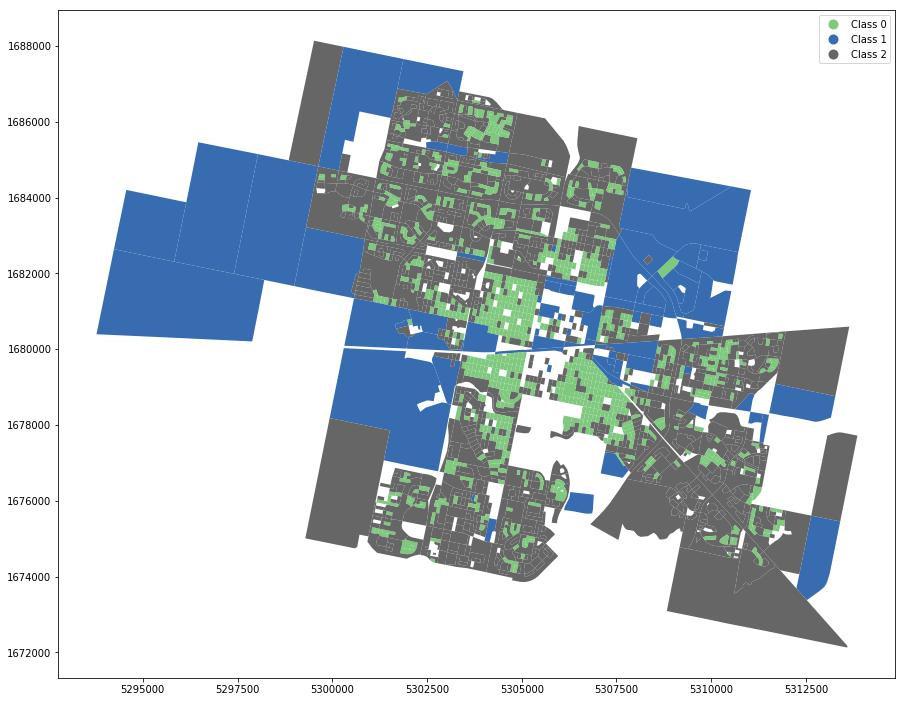

In [80]:
df_db.plot(figsize= (15,15), column='Labels', legend=True, cmap = 'Accent')
plt.savefig('DBclassification.png')

# Interpretation of Classes

In [0]:
DB_cluster0 = df_db[df_db.Labels=="Class 0"]
DB_cluster1 = df_db[df_db.Labels=="Class 1"]
DB_cluster2 = df_db[df_db.Labels=="Class 2"]
# DB_cluster3 = df_db[df_db.Labels=="Cluster 3"]
# DB_cluster4 = df_db[df_db.Labels=="Cluster 4"]

In [0]:
DB_cluster0.describe()

,AvgSize,BD,BCR,ProxMean,ContRatio
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,170.265173,0.001368,0.183997,2.603804,0.279462
std,120.354940,0.000636,0.052152,1.226209,0.124490
min,19.158797,0.000002,0.000518,0.290834,0.025000
25%,100.725493,0.000874,0.157896,1.885986,0.197647
50%,131.692834,0.001370,0.192732,2.341295,0.269231
75%,198.944197,0.001887,0.215141,2.969933,0.344828
max,1117.890557,0.002726,0.363798,10.038650,1.000000


#BCR

In [44]:
data0 = DB_cluster0.describe()["BCR"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["BCR"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["BCR"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)
# print("----------------------------")
# data3 = DB_cluster3.describe()["BCR"]
# data3 = data3.drop(labels=['count','mean','std'])
# print("For Cluster 3")
# print(data3)
# print("----------------------------")
# data4 = DB_cluster4.describe()["BCR"]
# data4 = data4.drop(labels=['count','mean','std'])
# print("For Cluster 4")
# print(data4)

For Class 0
min    0.088155
25%    0.214160
50%    0.233789
75%    0.255862
max    0.451689
Name: BCR, dtype: float64
----------------------------
For Class 1
min    0.000346
25%    0.048395
50%    0.127227
75%    0.215065
max    0.394877
Name: BCR, dtype: float64
----------------------------
For Class 2
min    0.000518
25%    0.155026
50%    0.191293
75%    0.214422
max    0.363798
Name: BCR, dtype: float64


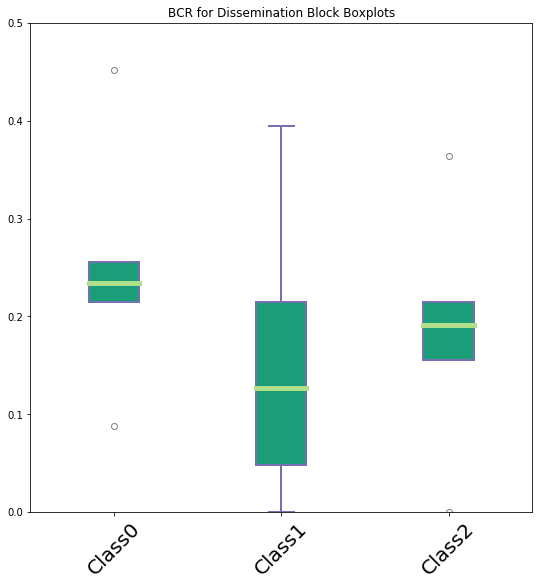

In [45]:
#data = [data0,data1,data2,data3,data4]
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('BCR for Dissemination Block Boxplots')
#ax.set_xticklabels(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'], rotation=45, fontsize=20)
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.5)

# Save the figure
fig.savefig('BCRforDB.png', bbox_inches='tight')

#Building Density

In [46]:
data0 = DB_cluster0.describe()["BD"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["BD"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["BD"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)
# print("----------------------------")
# data3 = DB_cluster3.describe()["BD"]
# data3 = data3.drop(labels=['count','mean','std'])
# print("For Cluster 3")
# print(data3)
# print("----------------------------")
# data4 = DB_cluster4.describe()["BD"]
# data4 = data4.drop(labels=['count','mean','std'])
# print("For Cluster 4")
# print(data4)

For Class 0
min    0.000274
25%    0.001884
50%    0.002330
75%    0.002716
max    0.004162
Name: BD, dtype: float64
----------------------------
For Class 1
min    0.000005
25%    0.000067
50%    0.000132
75%    0.000219
max    0.000416
Name: BD, dtype: float64
----------------------------
For Class 2
min    0.000002
25%    0.000851
50%    0.001337
75%    0.001875
max    0.002726
Name: BD, dtype: float64


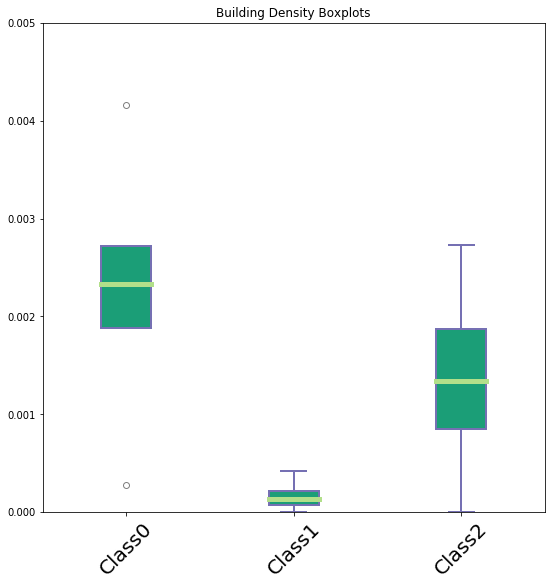

In [47]:
# data = [data0,data1,data2,data3,data4]
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Building Density Boxplots')
# ax.set_xticklabels(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'], rotation=45, fontsize=20)
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.005)

# Save the figure
fig.savefig('BuildingDensityforDB.png', bbox_inches='tight')

# Mean Proximity

In [48]:
data0 = DB_cluster0.describe()["ProxMean"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["ProxMean"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["ProxMean"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)
# print("----------------------------")
# data3 = DB_cluster3.describe()["ProxMean"]
# data3 = data3.drop(labels=['count','mean','std'])
# print("For Cluster 3")
# print(data3)
# print("----------------------------")
# data4 = DB_cluster4.describe()["ProxMean"]
# data4 = data4.drop(labels=['count','mean','std'])
# print("For Cluster 4")
# print(data4)

For Class 0
min    0.438028
25%    1.473680
50%    1.806752
75%    2.130898
max    6.081525
Name: ProxMean, dtype: float64
----------------------------
For Class 1
min     1.864270
25%     9.967164
50%    12.961265
75%    16.084481
max    37.431523
Name: ProxMean, dtype: float64
----------------------------
For Class 2
min     0.290834
25%     1.892661
50%     2.360064
75%     2.988273
max    10.038650
Name: ProxMean, dtype: float64


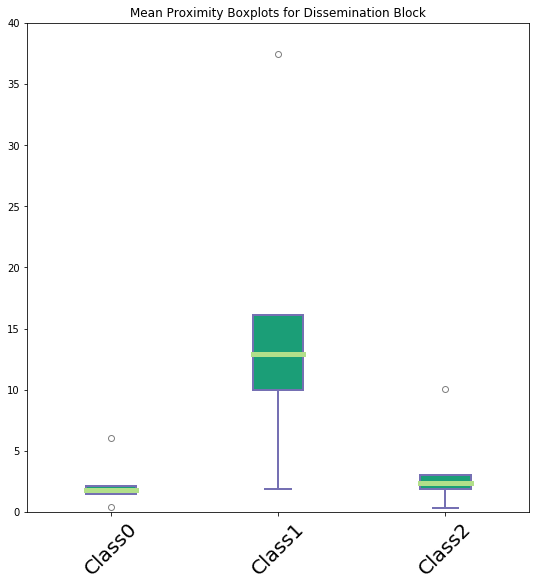

In [49]:
# data = [data0,data1,data2,data3,data4]
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Mean Proximity Boxplots for Dissemination Block')
# ax.set_xticklabels(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'], rotation=45, fontsize=20)
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,40)

# Save the figure
fig.savefig('MeanProximityforDB.png', bbox_inches='tight')

# Average Size

In [50]:
data0 = DB_cluster0.describe()["AvgSize"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["AvgSize"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["AvgSize"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)
# print("----------------------------")
# data3 = DB_cluster3.describe()["AvgSize"]
# data3 = data3.drop(labels=['count','mean','std'])
# print("For Cluster 3")
# print(data3)
# print("----------------------------")
# data4 = DB_cluster4.describe()["AvgSize"]
# data4 = data4.drop(labels=['count','mean','std'])
# print("For Cluster 4")
# print(data4)

For Class 0
min      62.321321
25%      82.054920
50%      96.906789
75%     125.043159
max    1146.567249
Name: AvgSize, dtype: float64
----------------------------
For Class 1
min      52.715684
25%     448.257557
50%     904.245895
75%    1207.579059
max    4771.681854
Name: AvgSize, dtype: float64
----------------------------
For Class 2
min      19.158797
25%     100.957617
50%     134.530522
75%     200.095946
max    1117.890557
Name: AvgSize, dtype: float64


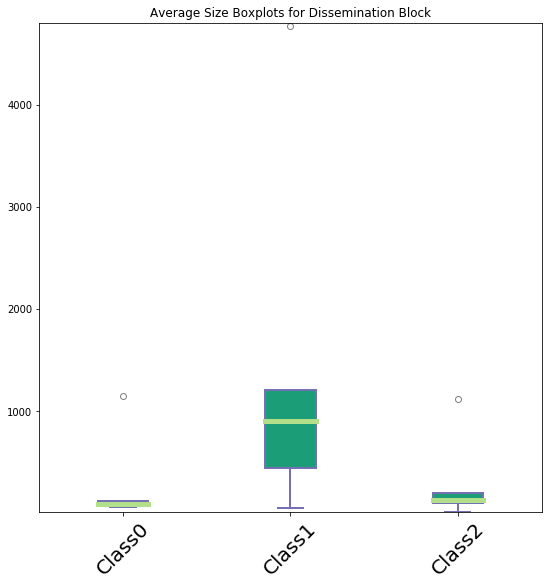

In [51]:
# data = [data0,data1,data2,data3,data4]
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Average Size Boxplots for Dissemination Block')
# ax.set_xticklabels(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'], rotation=45, fontsize=20)
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(15,4800)

# Save the figure
fig.savefig('AvgsizeforDB.png', bbox_inches='tight')

#Contiguity Ratio

In [52]:
data0 = DB_cluster0.describe()["ContRatio"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = DB_cluster1.describe()["ContRatio"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = DB_cluster2.describe()["ContRatio"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)
# print("----------------------------")
# data3 = DB_cluster3.describe()["ContRatio"]
# data3 = data3.drop(labels=['count','mean','std'])
# print("For Cluster 3")
# print(data3)
# print("----------------------------")
# data4 = DB_cluster4.describe()["ContRatio"]
# data4 = data4.drop(labels=['count','mean','std'])
# print("For Cluster 4")
# print(data4)

For Class 0
min    0.156863
25%    0.382979
50%    0.468736
75%    0.596834
max    1.000000
Name: ContRatio, dtype: float64
----------------------------
For Class 1
min    0.033898
25%    0.142857
50%    0.215751
75%    0.333333
max    0.666667
Name: ContRatio, dtype: float64
----------------------------
For Class 2
min    0.025000
25%    0.192308
50%    0.265734
75%    0.343750
max    1.000000
Name: ContRatio, dtype: float64


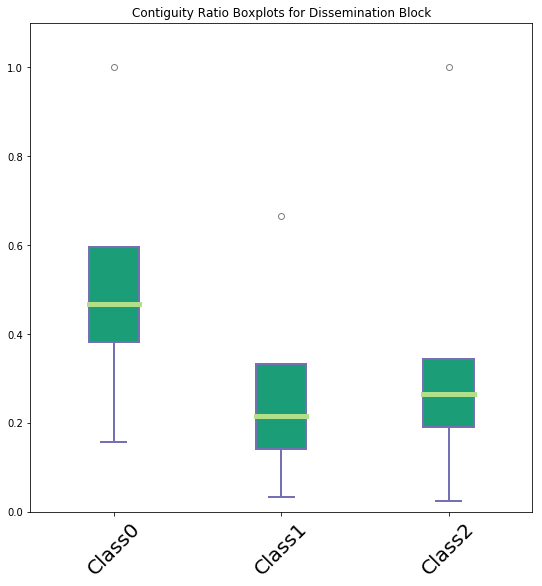

In [53]:
# data = [data0,data1,data2,data3,data4]
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Contiguity Ratio Boxplots for Dissemination Block')
# ax.set_xticklabels(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'], rotation=45, fontsize=20)
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,1.1)

# Save the figure
fig.savefig('ContiguityRatioforDB.png', bbox_inches='tight')

## Cluster 0
- BCR : High
- BD : High
- Mean Proximity : Low
- Average Size : Low
- Contiguity Ratio : High

## Cluster 1
- BCR : Low
- BD : Low
- Mean Proximity : High
- Average Size : High
- Contiguity Ratio : Low

## Cluster 2
- BCR : Medium
- BD : Medium
- Mean Proximity : Medium
- Average Size : Medium
- Contiguity Ratio : Medium

# 3. 1 km<sup>2</sup> Grid

In [54]:
gridstats.head()

,id,area,AvgSize,BldgCount,BD,BldgArea,BCR,ProxMean,ContCount,ContRatio,geometry
0,3922,1.000000e+06,40.357167,12,0.000012,484.286002,0.000484,2.761683,6.0,0.500000,"POLYGON ((5294439.034285 1683576.202855, 52954..."
1,3923,1.000000e+06,2570.114800,13,0.000013,33411.492398,0.033411,32.097878,2.0,0.153846,"POLYGON ((5294439.034285 1682576.202855, 52954..."
2,4019,1.000000e+06,51.317793,4,0.000004,205.271174,0.000205,58.923854,NaN,NaN,"POLYGON ((5295439.034285 1683576.202855, 52964..."
3,4020,1.000000e+06,148.553032,11,0.000011,1634.083353,0.001634,51.955178,2.0,0.181818,"POLYGON ((5295439.034285 1682576.202855, 52964..."
4,4021,1.000000e+06,9993.058286,10,0.000010,99930.582855,0.099931,20.197038,3.0,0.300000,"POLYGON ((5295439.034285 1681576.202855, 52964..."


In [55]:
df_grid = gridstats.drop(['area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_grid.head()

,id,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
0,3922,40.357167,0.000012,0.000484,2.761683,0.500000,"POLYGON ((5294439.034285 1683576.202855, 52954..."
1,3923,2570.114800,0.000013,0.033411,32.097878,0.153846,"POLYGON ((5294439.034285 1682576.202855, 52954..."
2,4019,51.317793,0.000004,0.000205,58.923854,NaN,"POLYGON ((5295439.034285 1683576.202855, 52964..."
3,4020,148.553032,0.000011,0.001634,51.955178,0.181818,"POLYGON ((5295439.034285 1682576.202855, 52964..."
4,4021,9993.058286,0.000010,0.099931,20.197038,0.300000,"POLYGON ((5295439.034285 1681576.202855, 52964..."


In [0]:
df_grid = df_grid.dropna(axis='rows')

In [57]:
df_grid.head()

,id,AvgSize,BD,BCR,ProxMean,ContRatio,geometry
0,3922,40.357167,0.000012,0.000484,2.761683,0.500000,"POLYGON ((5294439.034285 1683576.202855, 52954..."
1,3923,2570.114800,0.000013,0.033411,32.097878,0.153846,"POLYGON ((5294439.034285 1682576.202855, 52954..."
3,4020,148.553032,0.000011,0.001634,51.955178,0.181818,"POLYGON ((5295439.034285 1682576.202855, 52964..."
4,4021,9993.058286,0.000010,0.099931,20.197038,0.300000,"POLYGON ((5295439.034285 1681576.202855, 52964..."
7,4115,149.531578,0.000027,0.004037,33.231388,0.111111,"POLYGON ((5296439.034285 1684576.202855, 52974..."


In [58]:
X = df_grid.values[:,1:-1] #we are taking only the 5 statistics
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar from unscaled data a 
cluster_dataset

array([[-3.04650268e-01, -1.15481968e+00, -1.50821277e+00,
        -3.61964168e-01,  1.18127690e+00],
       [ 2.65982290e+00, -1.15303269e+00, -1.04028445e+00,
         3.81913746e+00, -1.38152386e+00],
       [-1.77861941e-01, -1.15660668e+00, -1.49187310e+00,
         6.64927237e+00, -1.17442883e+00],
       [ 1.13583308e+01, -1.15839368e+00, -9.49819047e-02,
         2.12298629e+00, -2.99452409e-01],
       [-1.76715241e-01, -1.12801472e+00, -1.45772024e+00,
         3.98068945e+00, -1.69791899e+00],
       [-2.53886593e-01, -1.13516271e+00, -1.48774495e+00,
         9.29501357e-01, -1.87675104e+00],
       [ 5.12970541e-02, -1.13694971e+00, -1.40751251e+00,
         1.25005016e+00, -1.17442883e+00],
       [-3.12697059e-01, -1.15839368e+00, -1.51033575e+00,
         3.90824368e+00, -1.03981707e+00],
       [-3.34866710e-01, -1.17268966e+00, -1.51468090e+00,
        -6.52786672e-01,  4.88310018e+00],
       [-2.69631546e-01, -1.11907973e+00, -1.48315295e+00,
        -2.06865798e-01

In [59]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
new_lab = []
for label in labels:
    new_lab.append("Class "+str(label))

In [61]:
new_lab = np.asarray(new_lab)
new_lab

array(['Class 0', 'Class 0', 'Class 0', 'Class 2', 'Class 0', 'Class 0',
       'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 1',
       'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1',
       'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 0', 'Class 1',
       'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 0', 'Class 0',
       'Class 0', 'Class 1', 'Class 1', 'Class 0', 'Class 1', 'Class 1',
       'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 0', 'Class 0',
       'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 0', 'Class 0',
       'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1',
       'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1',
       'Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1',
       'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1', 'Class 1',
       'Class 1', 'Class 1', 'Class 0', 'Class 1', 'Class 1', 'Class 1',
       'Class 1', 'Class 1', 'Class 1', 'Class 0', 

In [62]:
df_grid['Labels'] = new_lab
df_grid.head()

,id,AvgSize,BD,BCR,ProxMean,ContRatio,geometry,Labels
0,3922,40.357167,0.000012,0.000484,2.761683,0.500000,"POLYGON ((5294439.034285 1683576.202855, 52954...",Class 0
1,3923,2570.114800,0.000013,0.033411,32.097878,0.153846,"POLYGON ((5294439.034285 1682576.202855, 52954...",Class 0
3,4020,148.553032,0.000011,0.001634,51.955178,0.181818,"POLYGON ((5295439.034285 1682576.202855, 52964...",Class 0
4,4021,9993.058286,0.000010,0.099931,20.197038,0.300000,"POLYGON ((5295439.034285 1681576.202855, 52964...",Class 2
7,4115,149.531578,0.000027,0.004037,33.231388,0.111111,"POLYGON ((5296439.034285 1684576.202855, 52974...",Class 0


In [0]:
df_grid['Labels'] = df_grid['Labels'].astype(object)

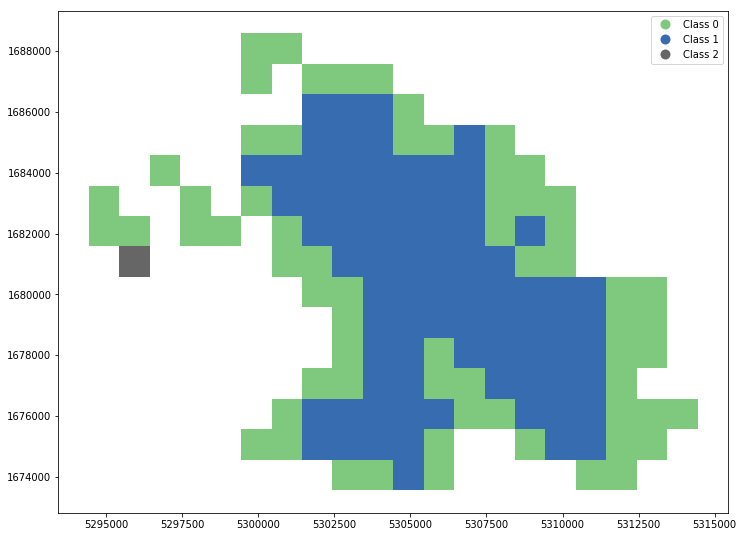

In [77]:
df_grid.plot(figsize= (12,12), column='Labels', legend=True , cmap = 'Accent')
plt.savefig('GRIDclassification.png')

# Interpretation of Classes

In [0]:
GRID_cluster0 = df_grid[df_grid.Labels=="Class 0"]
GRID_cluster1 = df_grid[df_grid.Labels=="Class 1"]
GRID_cluster2 = df_grid[df_grid.Labels=="Class 2"]

# BCR

In [66]:
data0 = GRID_cluster0.describe()["BCR"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["BCR"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["BCR"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.000029
25%    0.007570
50%    0.030715
75%    0.059931
max    0.147493
Name: BCR, dtype: float64
----------------------------
For Class 1
min    0.090809
25%    0.143440
50%    0.161237
75%    0.186438
max    0.249969
Name: BCR, dtype: float64
----------------------------
For Class 2
min    0.099931
25%    0.099931
50%    0.099931
75%    0.099931
max    0.099931
Name: BCR, dtype: float64


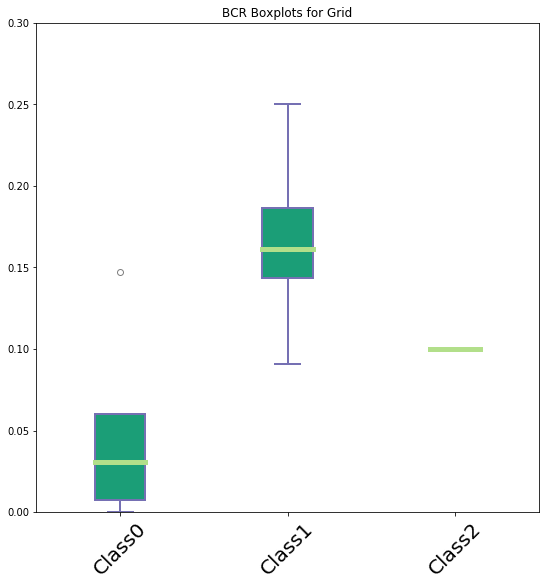

In [67]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('BCR Boxplots for Grid')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.3)

# Save the figure
fig.savefig('BCRforGRID.png', bbox_inches='tight')

#Building Density

In [68]:
data0 = GRID_cluster0.describe()["BD"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["BD"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["BD"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.000002
25%    0.000032
50%    0.000131
75%    0.000246
max    0.000684
Name: BD, dtype: float64
----------------------------
For Class 1
min    0.000179
25%    0.000806
50%    0.001051
75%    0.001348
max    0.002280
Name: BD, dtype: float64
----------------------------
For Class 2
min    0.00001
25%    0.00001
50%    0.00001
75%    0.00001
max    0.00001
Name: BD, dtype: float64


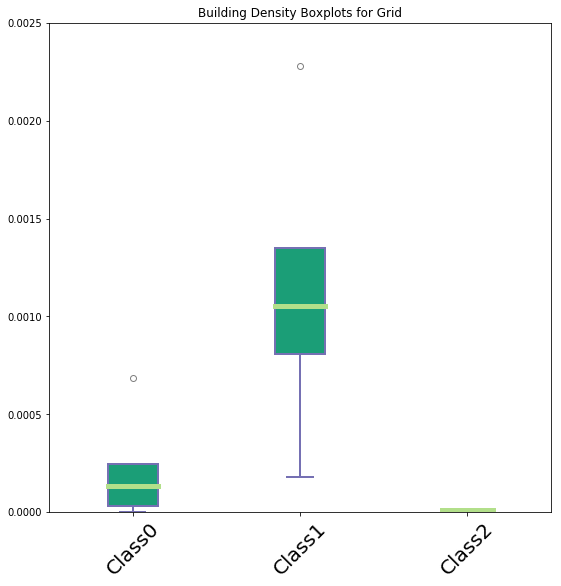

In [69]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Building Density Boxplots for Grid')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,0.0025)

# Save the figure
fig.savefig('BuildingDensityforGRID.png', bbox_inches='tight')


# Mean Proximity

In [70]:
data0 = GRID_cluster0.describe()["ProxMean"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["ProxMean"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["ProxMean"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min     0.721162
25%     2.711607
50%     4.079828
75%    11.149901
max    51.955178
Name: ProxMean, dtype: float64
----------------------------
For Class 1
min    1.275840
25%    2.121742
50%    2.306189
75%    2.754244
max    9.161199
Name: ProxMean, dtype: float64
----------------------------
For Class 2
min    20.197038
25%    20.197038
50%    20.197038
75%    20.197038
max    20.197038
Name: ProxMean, dtype: float64


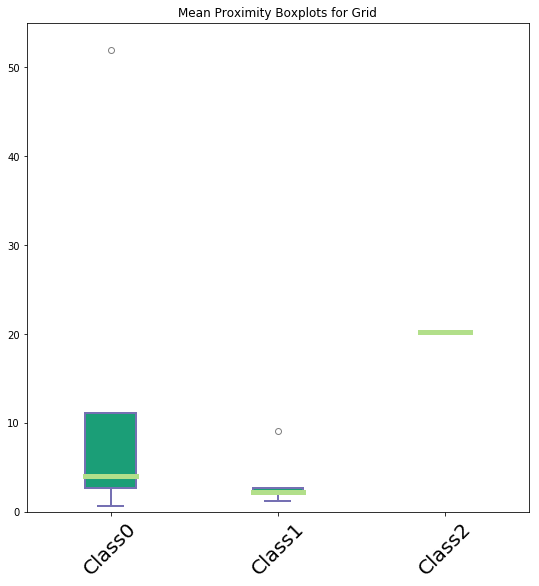

In [71]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Mean Proximity Boxplots for Grid')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,55)

# Save the figure
fig.savefig('MeanProximityforGRID.png', bbox_inches='tight')

# Average Size

In [72]:
data0 = GRID_cluster0.describe()["AvgSize"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["AvgSize"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["AvgSize"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min      14.571717
25%     117.558573
50%     175.199387
75%     268.369156
max    2570.114800
Name: AvgSize, dtype: float64
----------------------------
For Class 1
min      79.313675
25%     119.528937
50%     156.681202
75%     211.682681
max    1062.706135
Name: AvgSize, dtype: float64
----------------------------
For Class 2
min    9993.058286
25%    9993.058286
50%    9993.058286
75%    9993.058286
max    9993.058286
Name: AvgSize, dtype: float64


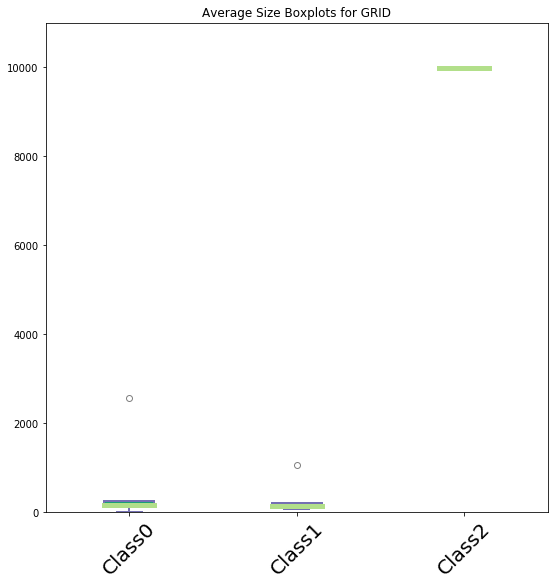

In [73]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Average Size Boxplots for GRID')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(10,11000)

# Save the figure
fig.savefig('AvgsizeforGRID.png', bbox_inches='tight')

# Contiguity Ratio

In [74]:
data0 = GRID_cluster0.describe()["ContRatio"]
data0 = data0.drop(labels=['count','mean','std'])
print("For Class 0")
print(data0)
print("----------------------------")
data1 = GRID_cluster1.describe()["ContRatio"]
data1 = data1.drop(labels=['count','mean','std'])
print("For Class 1")
print(data1)
print("----------------------------")
data2 = GRID_cluster2.describe()["ContRatio"]
data2 = data2.drop(labels=['count','mean','std'])
print("For Class 2")
print(data2)

For Class 0
min    0.050000
25%    0.200000
50%    0.310345
75%    0.388889
max    1.000000
Name: ContRatio, dtype: float64
----------------------------
For Class 1
min    0.193841
25%    0.280779
50%    0.321940
75%    0.371933
max    0.657018
Name: ContRatio, dtype: float64
----------------------------
For Class 2
min    0.3
25%    0.3
50%    0.3
75%    0.3
max    0.3
Name: ContRatio, dtype: float64


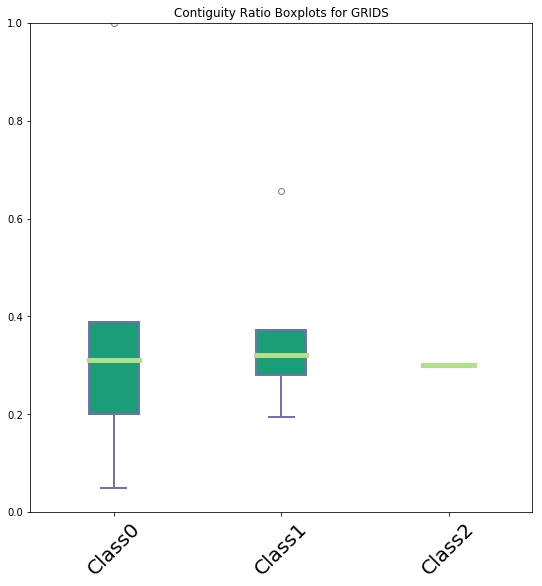

In [75]:
data = [data0,data1,data2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)

#formatting options in matplotlib
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=5)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    
ax.set_title('Contiguity Ratio Boxplots for GRIDS')
ax.set_xticklabels(['Class0', 'Class1', 'Class2'], rotation=45, fontsize=20)
ax.set_ylim(0,1)

# Save the figure
fig.savefig('ContiguityRatioforGRID.png', bbox_inches='tight')

## Cluster 0
- BCR : Low
- BD : Medium
- Mean Proximity : Medium
- Average Size : Medium
- Contiguity Ratio : Medium

## Cluster 1
- BCR : High
- BD : High
- Mean Proximity : Low
- Average Size : Low
- Contiguity Ratio : High

## Cluster 2
- BCR : Medium
- BD : Low
- Mean Proximity : High
- Average Size : High
- Contiguity Ratio : Low

In [79]:
# !pip install geocoder
import geocoder
from geopy.geocoders import Nominatim
address = 'Regina, Saskatchewan'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Regina are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Regina are 50.44876, -104.61731.
